# Depth-frequency plots

Loads depth-frequency-time data and then plots time-averaged depth-frequency power.

## Imports
Necessary modules for analysis.

In [1]:
# import modules

import xarray as xr
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as pldates
import numpy as np
for i in range(2):
    %matplotlib notebook

In [2]:
# import data

adcp = 'Slope'     # Slope(2013,2014,2017,2018), Axis75(2013,2014), Axis55(2017,2018)
year = 2013
ds_in = xr.open_dataset(f'../Data/data/spectra/spectra_{adcp}_{year}_0.nc')

n_seg = ds_in.n_seg
if n_seg > 1:
    ds = [ds_in]
    for i in range(n_seg):
        if i > 0:
            ds_temp = xr.open_dataset(f'../Data/data/spectra/spectra_{adcp}_{year}_{i}.nc')
            ds.append(ds_temp)
elif n_seg == 1:
    ds = [ds_in]

#print(ds)

In [3]:
# extract plotting variables

t_stamp = int(ds[0].t_stamp)
start_date = dt.datetime(t_stamp,1,1)                                   # input start date in YYYY,MM,DD
end_date = dt.datetime(t_stamp+1,1,1)                                     # input end date in YYYY,MM,DD
depth = ds[0].depth.values
d = len(depth)

## Depth-frequency PSD plots

In [4]:
# time-average at each depth

t_tot = 0                          # for weighted averaging
for i in range(n_seg):
    t_tot += len(ds[i].spect)

Sxxu_t,Sxxv_t = [],[]
for i in range(n_seg):
    t_weight = (len(ds[i].spect)) / t_tot
    Sxxu_temp = ds[i].Sxxu.mean(dim='spect') * t_weight
    Sxxu_t.append(np.asarray(Sxxu_temp.values))
    Sxxv_temp = ds[i].Sxxv.mean(dim='spect') * t_weight
    Sxxv_t.append(np.asarray(Sxxv_temp.values))
    
Sxxu_tm,Sxxv_tm = [Sxxu_t[0]],[Sxxv_t[0]]
for i in range(1,n_seg):
    Sxxu_tm += Sxxu_t[i]
    Sxxv_tm += Sxxv_t[i]

In [5]:
# WKB scale at each depth

u_WKB,v_WKB = [],[]

for j in range(d):
    u_WKB.append(Sxxu_tm[0][j] / ds[0].WKB_scale[j].values)          # [list][depth][frequency]
    v_WKB.append(Sxxv_tm[0][j] / ds[0].WKB_scale[j].values)          # [list][depth][frequency]

<IPython.core.display.Javascript object>


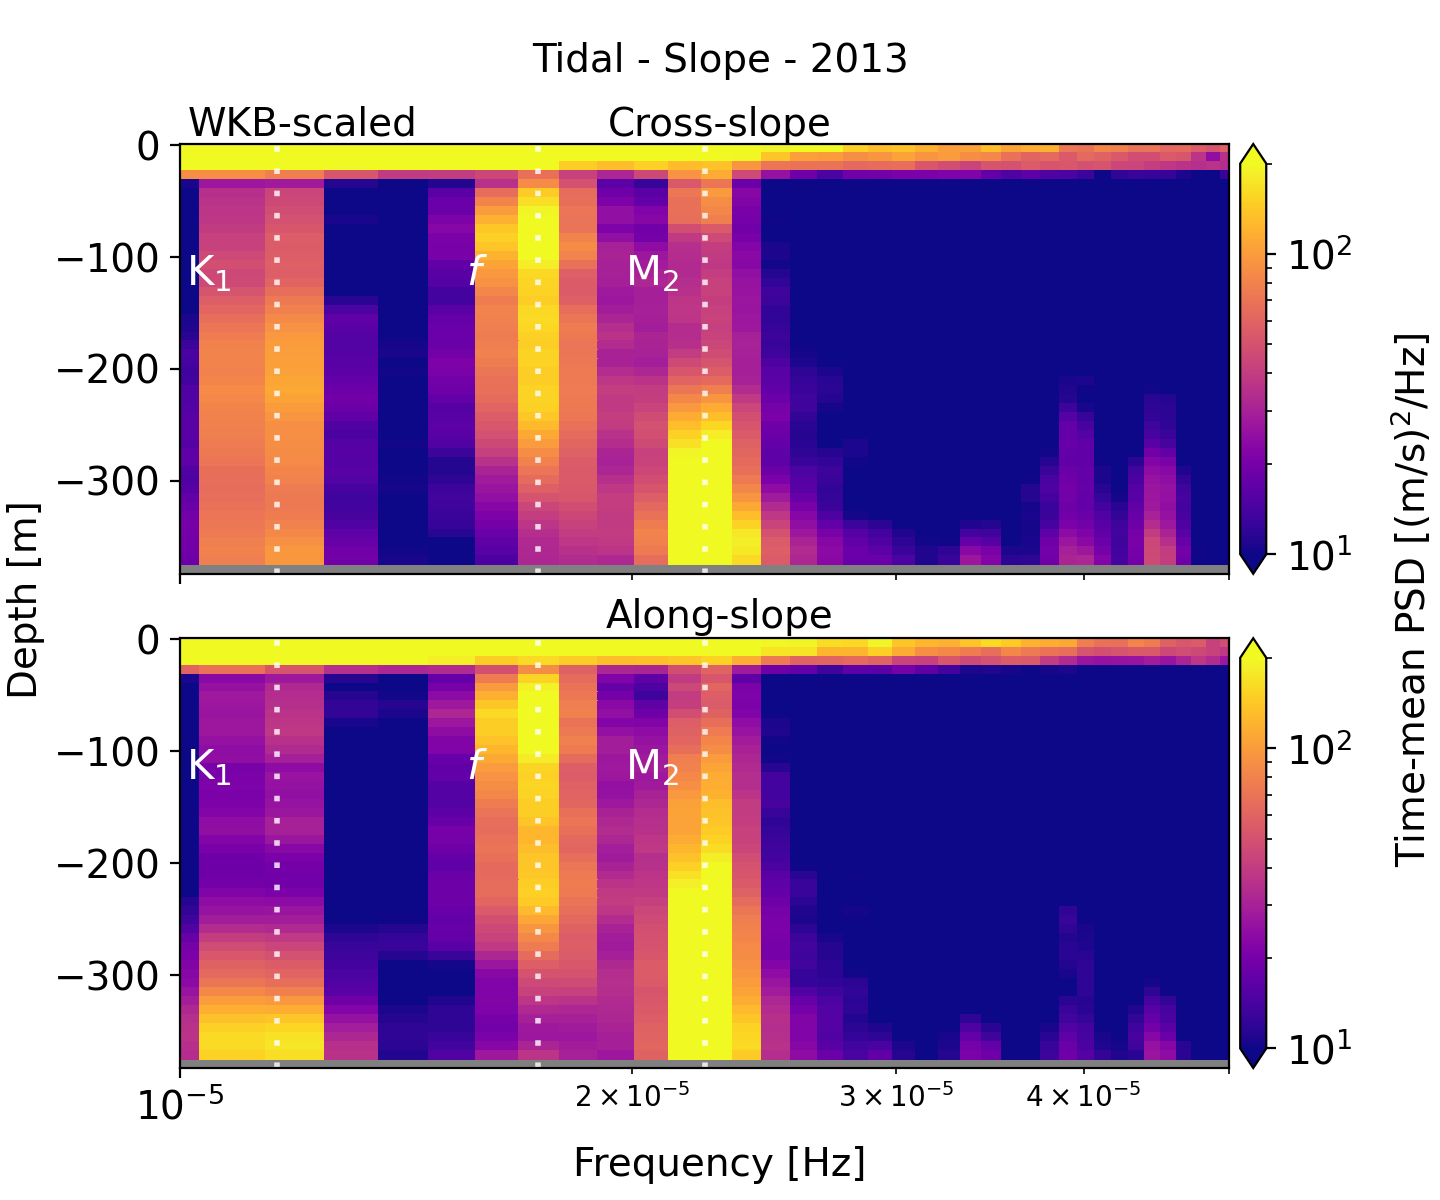

In [7]:
# plot PSD frequency band power versus depth

band = 'Tidal'           # Tidal, Subdiurnal, Continuum

fig,(ax0,ax1) = plt.subplots(2,1,figsize=(7.2,6),sharey=True,sharex=True)
fig.subplots_adjust(hspace = 0.15)

fig.text(0.5, 0.94, f'{band} - {adcp} - {t_stamp}', ha='center', fontsize=14)
fig.text(0.005, 0.5, 'Depth [m]', va='center', rotation='vertical',fontsize=14)
fig.text(0.965, 0.5, 'Time-mean PSD [(m/s)$^2$/Hz]', va='center', rotation='vertical',fontsize=14)
fig.text(0.5, 0.02, 'Frequency [Hz]', ha='center',fontsize=14)
fig.text(0.21, 0.887, 'WKB-scaled', ha='center',fontsize=14)

if band == 'Tidal':
    ax1.set_xlim(1e-5,5e-5)
    for i in [ax0,ax1]:
        if adcp == 'Slope':
            pltdepth = -125
        elif adcp == 'Axis75' or adcp == 'Axis55':
            pltdepth = -720
        pltcolor = 'white'
        i.axvline(1.161e-5, color =pltcolor,lw=2,ls=(0,(1,3)),alpha=0.8) # constituents
        i.axvline(1.732e-5, color =pltcolor,lw=2,ls=(0,(1,3)),alpha=0.8)    
        i.axvline(2.236e-5, color =pltcolor,lw=2,ls=(0,(1,3)),alpha=0.8)
        i.text(1.01e-5,pltdepth,'K$_1$',fontsize=15,color=pltcolor)
        i.text(1.55e-5,pltdepth,'$f$',fontsize=15,color=pltcolor)
        i.text(1.98e-5,pltdepth,'M$_2$',fontsize=15,color=pltcolor)    
    if adcp == 'Axis55' or adcp == 'Axis75':
        vmin = 1e1
        vmax = 1e3
        fig.text(0.5, 0.887, 'Cross-canyon', ha='center', fontsize=14)
        fig.text(0.5, 0.477, 'Along-canyon', ha='center', fontsize=14)
    elif adcp == 'Slope':
        vmin = 1e1
        vmax = 2e2
        fig.text(0.5, 0.887, 'Cross-slope', ha='center', fontsize=14)
        fig.text(0.5, 0.477, 'Along-slope', ha='center', fontsize=14)
elif band == 'Subdiurnal':
    ax1.set_xlim(1e-6,1e-5)
    if adcp == 'Axis55' or adcp == 'Axis75':
        vmin = 1e1
        vmax = 1e2
        fig.text(0.5, 0.887, 'Cross-canyon', ha='center', fontsize=14)
        fig.text(0.5, 0.477, 'Along-canyon', ha='center', fontsize=14)
    elif adcp == 'Slope':
        vmin = 1e1
        vmax = 1e3
        fig.text(0.5, 0.887, 'Cross-slope', ha='center', fontsize=14)
        fig.text(0.5, 0.477, 'Along-slope', ha='center', fontsize=14)
elif band == 'Continuum':
    ax1.set_xlim(7e-5,2e-4)
    if adcp == 'Axis55' or adcp == 'Axis75':
        vmin = 5e-1
        vmax = 5e0
        fig.text(0.5, 0.887, 'Cross-canyon', ha='center', fontsize=14)
        fig.text(0.5, 0.477, 'Along-canyon', ha='center', fontsize=14)
    elif adcp == 'Slope':
        vmin = 5e-1
        vmax = 5e0
        fig.text(0.5, 0.887, 'Cross-slope', ha='center', fontsize=14)
        fig.text(0.5, 0.477, 'Along-slope', ha='center', fontsize=14)
    
im0 = ax0.pcolormesh(ds[0].specf, -depth, u_WKB, rasterized=True, \
                        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='plasma',shading='auto')  
im1 = ax1.pcolormesh(ds[0].specf, -depth, v_WKB, rasterized=True, \
                        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='plasma',shading='auto')  

cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=15, extend='both')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=15, extend='both')
cbar0.ax.tick_params(labelsize=14)
cbar1.ax.tick_params(labelsize=14)

ax0.patch.set_facecolor('grey')
ax1.patch.set_facecolor('grey')
ax0.set_xscale('log')
ax1.set_xscale('log')

ax0.tick_params(labelsize=14)
ax1.tick_params(labelsize=14)

plt.show()

plt.savefig(fname=f'./plots/depthfreq_plots/depthfreq_psd_{band}_{adcp}_{t_stamp}.pdf',format='pdf')

## Depth-frequency rotary plots

In [8]:
# time-average at each depth

t_tot = 0                          # for weighted averaging
for i in range(n_seg):
    t_tot += len(ds[i].spect)

cw_t,ccw_t = [],[]
for i in range(n_seg):
    t_weight = (len(ds[i].spect)) / t_tot
    cw_temp = ds[i].cw.mean(dim='spect') * t_weight
    cw_t.append(np.asarray(cw_temp.values))
    ccw_temp = ds[i].ccw.mean(dim='spect') * t_weight
    ccw_t.append(np.asarray(ccw_temp.values))
    
cw_tm,ccw_tm = [cw_t[0]],[ccw_t[0]]
for i in range(1,n_seg):
    cw_tm += cw_t[i]
    ccw_tm += ccw_t[i]

In [9]:
# WKB scale at each depth

cw_WKB,ccw_WKB = [],[]

for j in range(d):
    cw_WKB.append(cw_tm[0][j] / ds[0].WKB_scale[j].values)          # [list][depth][frequency]
    ccw_WKB.append(ccw_tm[0][j] / ds[0].WKB_scale[j].values)          # [list][depth][frequency]

<IPython.core.display.Javascript object>


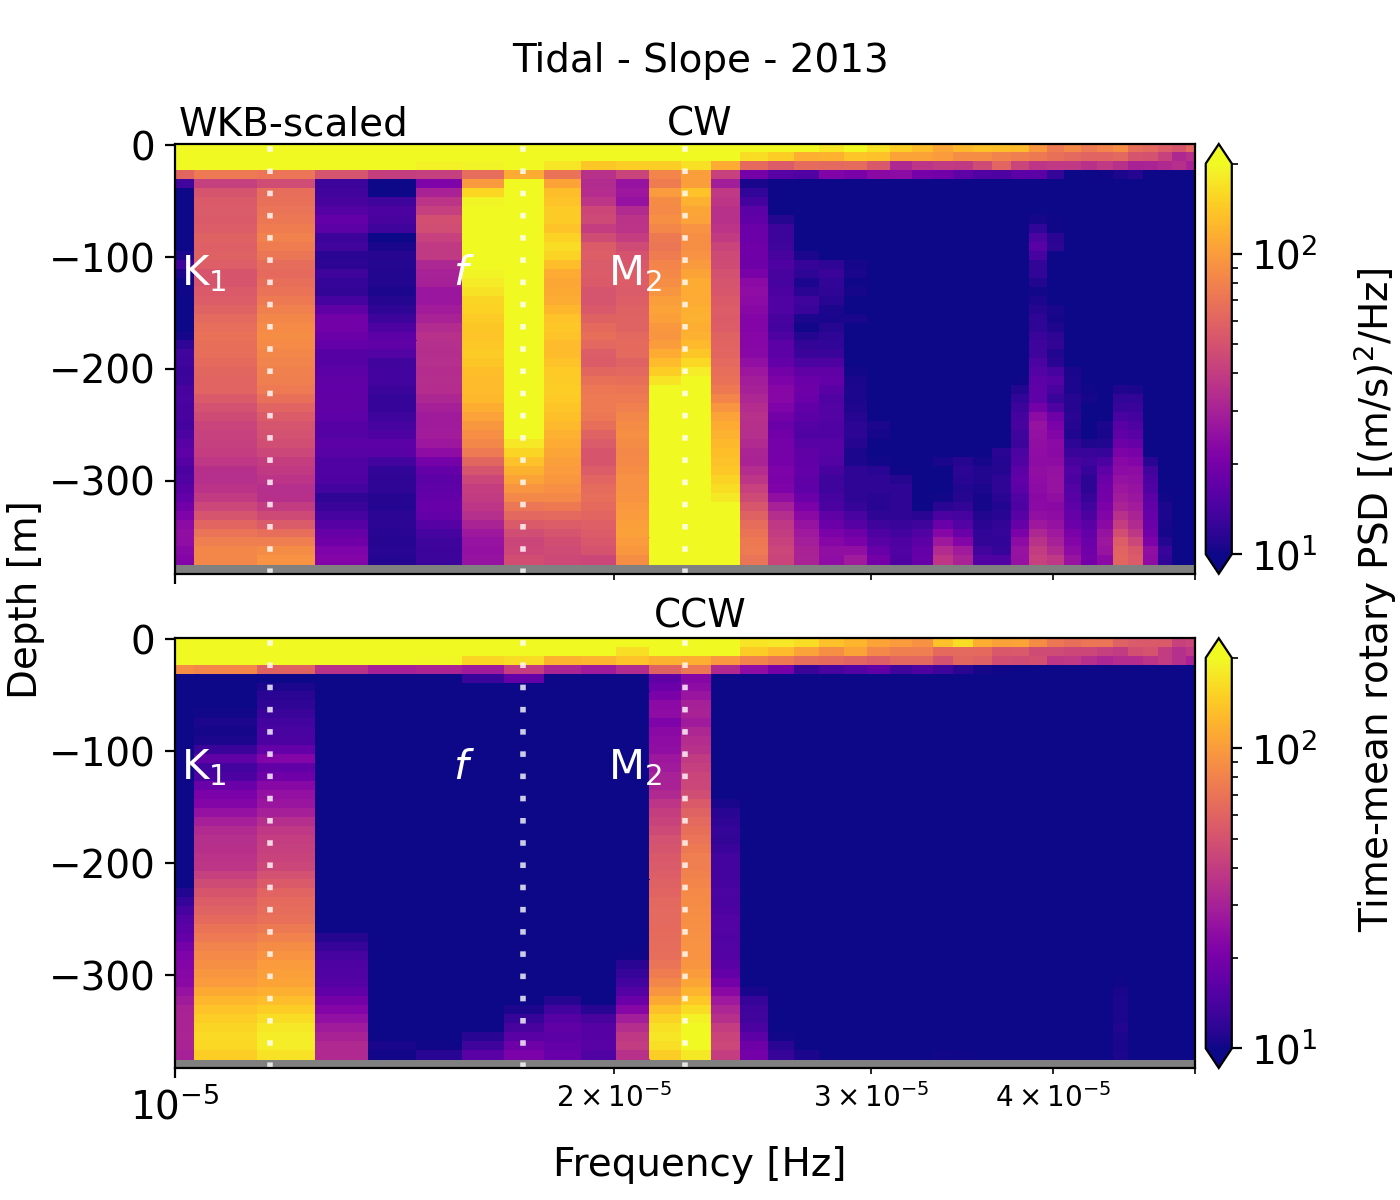

In [10]:
# plot PSD frequency band power versus depth

fig,(ax0,ax1) = plt.subplots(2,1,figsize=(7,6),sharey=True,sharex=True)
fig.subplots_adjust(hspace = 0.15)

fig.text(0.5, 0.94, f'{band} - {adcp} - {t_stamp}', ha='center', fontsize=14)
fig.text(0.005, 0.5, 'Depth [m]', va='center', rotation='vertical',fontsize=14)
fig.text(0.965, 0.5, 'Time-mean rotary PSD [(m/s)$^2$/Hz]', va='center', rotation='vertical',fontsize=14)
fig.text(0.5, 0.02, 'Frequency [Hz]', ha='center',fontsize=14)
fig.text(0.21, 0.887, 'WKB-scaled', ha='center',fontsize=14)

if adcp == 'Axis55' or adcp == 'Axis75':
    vmin = 1e1
    vmax = 1e3
elif adcp == 'Slope':
    vmin = 1e1
    vmax = 2e2

if band == 'Tidal':
    ax1.set_xlim(1e-5,5e-5)
    for i in [ax0,ax1]:
        if adcp == 'Slope':
            pltdepth = -125
        elif adcp == 'Axis75' or adcp == 'Axis55':
            pltdepth = -720
        pltcolor = 'white'
        i.axvline(1.161e-5, color =pltcolor,lw=2,ls=(0,(1,3)),alpha=0.8) # constituents
        i.axvline(1.732e-5, color =pltcolor,lw=2,ls=(0,(1,3)),alpha=0.8)    
        i.axvline(2.236e-5, color =pltcolor,lw=2,ls=(0,(1,3)),alpha=0.8)
        i.text(1.01e-5,pltdepth,'K$_1$',fontsize=15,color=pltcolor)
        i.text(1.55e-5,pltdepth,'$f$',fontsize=15,color=pltcolor)
        i.text(1.98e-5,pltdepth,'M$_2$',fontsize=15,color=pltcolor)    
    if adcp == 'Axis55' or adcp == 'Axis75':
        vmin = 1e1
        vmax = 1e3
    elif adcp == 'Slope':
        vmin = 1e1
        vmax = 2e2
elif band == 'Subdiurnal':
    ax1.set_xlim(1e-6,1e-5)
    if adcp == 'Axis55' or adcp == 'Axis75':
        vmin = 1e1
        vmax = 1e2
    elif adcp == 'Slope':
        vmin = 1e1
        vmax = 1e3
elif band == 'Continuum':
    ax1.set_xlim(7e-5,2e-4)
    if adcp == 'Axis55' or adcp == 'Axis75':
        vmin = 5e-1
        vmax = 5e0
    elif adcp == 'Slope':
        vmin = 5e-1
        vmax = 5e0 
        
fig.text(0.5, 0.887, 'CW', ha='center', fontsize=14)
fig.text(0.5, 0.477, 'CCW', ha='center', fontsize=14)    
    

im0 = ax0.pcolormesh(ds[0].specf, -depth, cw_WKB, rasterized=True, \
                        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='plasma',shading='auto')  
im1 = ax1.pcolormesh(ds[0].specf, -depth, ccw_WKB, rasterized=True, \
                        norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='plasma',shading='auto')  

cbar0 = fig.colorbar(im0, ax=ax0, fraction=0.05, pad=0.01, aspect=15, extend='both')
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.05, pad=0.01, aspect=15, extend='both')
cbar0.ax.tick_params(labelsize=14)
cbar1.ax.tick_params(labelsize=14)

ax0.patch.set_facecolor('grey')
ax1.patch.set_facecolor('grey')
ax0.set_xscale('log')
ax1.set_xscale('log')

ax0.tick_params(labelsize=14)
ax1.tick_params(labelsize=14)

plt.show()

plt.savefig(fname=f'./plots/depthfreq_plots/depthfreq_rot_{band}_{adcp}_{t_stamp}.pdf',format='pdf')